# 1. CHAPTER 10- SIMPLE LINEAR REGRESSION

## 2. By Paul Carlson

## 3. What does a Simple Linear Regression Model Do?
#### It assesses the strength of a linear relationship between two variables

## 4. Several libraries and modules are needed for linear regression and model creation

In [15]:
# import necessary libraries, modules, and functions
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 5. The Seaborn diamond dataset is used for this assignment

In [21]:
diamond_data = sns.load_dataset('diamonds')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 6. The diamond data set has ten variables and 53,940 records!

In [23]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 7. Pearson Correlation Coefficient (r-value)
    * The r-value shows the degree of association between two numeric variables
    * The values of r range from -1.0 to 1.0
    * A value less than zero indicates a negative relationship between variables
    * A value greater than zero indicates a positive relationship
    * Values closer to zero indicate a very weak relationship
    * Values closer to +1.0 or -1.0 indicate a very strong relationship

## 8.  A correlation matrix shows the strength of relationship(s) between numeric variables

In [83]:
# Create a correlation matrix for numeric variables in the diamond dataset
diamond_corr_matrix = diamond_data.select_dtypes(include='number').corr()
print(diamond_corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


## 9. A heatmap is a graphical view of the same information as a correlation matrix 

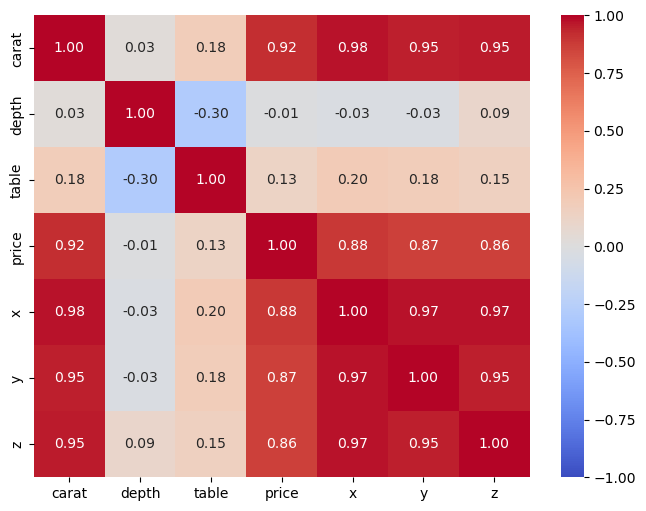

In [32]:
# create a heatmap for the correlation data
plt.figure(figsize=(8, 6)) 
sns.heatmap(diamond_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [62]:
# Focus on how 'price' correlates with the others
price_corr = diamond_corr_matrix[['price']]

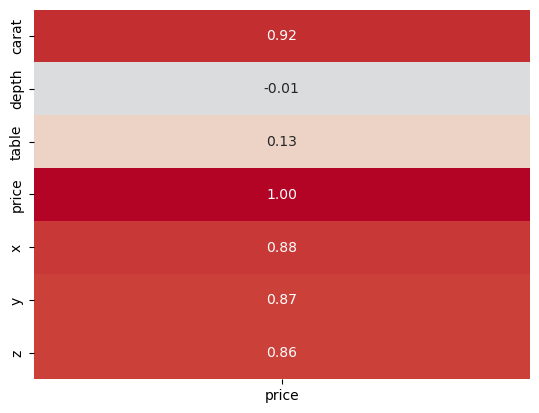

In [64]:
# Create the heatmap for 'unit_cost_org' correlations
sns.heatmap(price_corr,annot=True, cmap='coolwarm', cbar=False, fmt='.2f', vmin=-1, vmax=1)
plt.show()

## 10. Procedure for Creating and Using a Regression Model
  1. Import the dataset
  2. Split the dataset into a training dataset and a test dataset
  3. Use the training dataset to create a regression model
  4. Use the test dataset to validate the regression model
  5. Use the validated model to predict dependent variable values

## 11. Regression models depend on the following modules (already imported at step 4, above)
    * from sklearn.linear_model import LinearRegression
    * from sklearn.model_selection import train_test_split

## 12. Use a scatter plot to examine the relationship between price and carat (r= 0.92) 

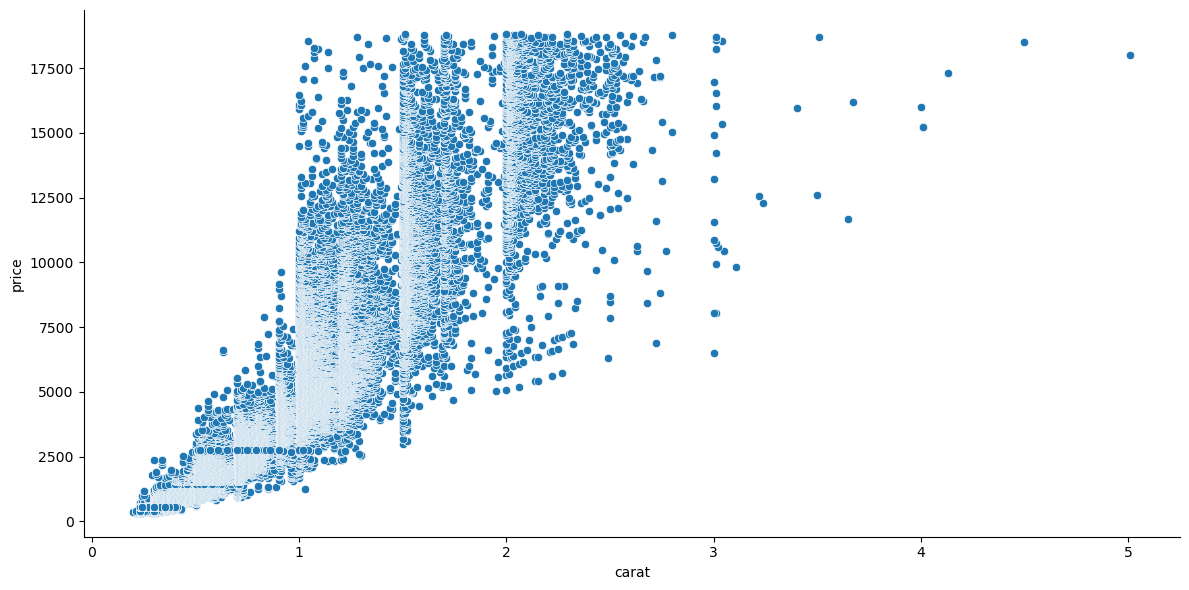

In [97]:
# use a scatterplot to plot the relationship between diamond prices and size (carats)
sns.relplot(data=diamond_data, x='carat', y='price', kind='scatter', height=6, aspect=2)
plt.show()

### The diamond dataset does not meet the criteria for parametric statistics or simple linear regression
* Many entries are classified as 1.0, 1.5, or 2.0 carats, making the x-axis quasi-categorical
* The overall shape of the relationship is curvilinear
* And the scatter between price and carat value increases as the size increases

### We will start cleaning the data by creating a new dataframe containing only the price and carat data

In [113]:
# Subset the DataFrame to include 'Size', 'Weight' and the record number (index)
sub_diamond = diamond_data[['price', 'carat']].reset_index()
sub_diamond = sub_diamond.rename(columns={'index': 'Record_Number'})
sub_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Record_Number  53940 non-null  int64  
 1   price          53940 non-null  int64  
 2   carat          53940 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [119]:
sub_sub_dat = sub_diamond[~sub_diamond['carat'].isin([0.5,0.75, 0.9, 1.0, 1.5, 1.75, 2.0])]

In [142]:
sub_sub_dat.loc[:, 'log_price'] = np.log10(sub_sub_dat['price'])

In [144]:
sub_sub_dat.loc[:, 'ln_carat'] = np.log(sub_sub_dat['carat'])

In [146]:
sub_sub_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48282 entries, 0 to 53938
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Record_Number  48282 non-null  int64  
 1   price          48282 non-null  int64  
 2   carat          48282 non-null  float64
 3   ln_price       48282 non-null  float64
 4   log_price      48282 non-null  float64
 5   ln_carat       48282 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 3.6 MB


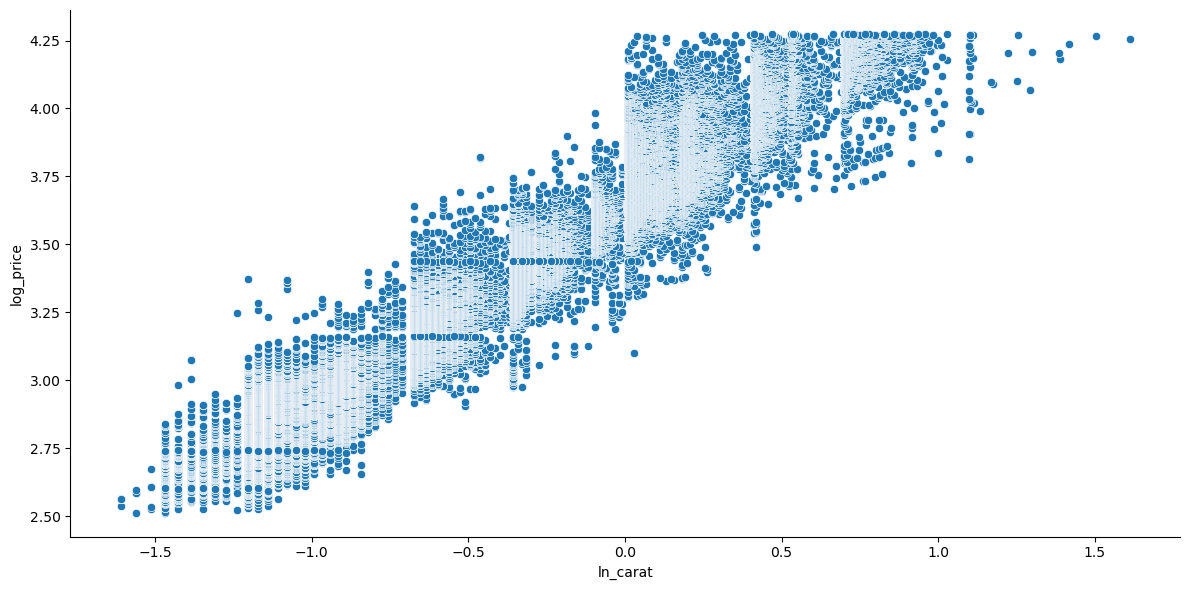

In [150]:
# use a scatterplot to plot the relationship between diamond prices and size (carats)
sns.relplot(data=sub_sub_dat, x='ln_carat', y='log_price', kind='scatter', height=6, aspect=2)
plt.show()

### By removing categorical carat values, transforming price to log-10, and carats to ln-e, we have a linear relationship 
### Discrete breaks in both variables are still noticeable 

In [166]:
# split the training and testing data
# from sklearn.model_selection import train_test_split
X = sub_sub_dat[['ln_carat']] 
y = sub_sub_dat['log_price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [168]:
# create the model and fit the training data
# from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [170]:
# Train the model on the training data and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [172]:
# score the testing data
r2_score = model.score(X_test, y_test)
print(f'R-squared score: {r2_score}')

R-squared score: 0.9346752572091408


In [198]:
# Calculate and display slope and intercept for the regression
slope = model.coef_[0]
intercept = model.intercept_

In [200]:
print(f"Slope (Coefficient): {slope}")
print(f"Y-intercept: {intercept}")

Slope (Coefficient): 0.7267111051228488
Y-intercept: 3.6676224443364815


In [175]:
# make the predictions
yval_pred =  model.predict(X_test)
yval_pred

array([2.79268204, 3.67485346, 2.94508828, ..., 3.80614838, 3.23316766,
       3.44880603])

In [179]:
yval_pred_data = pd.DataFrame(yval_pred, columns=['log_price_pred'])

In [184]:
all_diamond_data = yval_pred_data.join([X_test.reset_index(drop=True), y_test.reset_index(drop=True)])
all_diamond_data = all_diamond_data.sort_values(by='ln_carat')
all_diamond_data.head()

,log_price_pred,ln_carat,log_price
15297,2.498026,-1.609438,2.564666
10769,2.498026,-1.609438,2.564666
20485,2.498026,-1.609438,2.564666
23858,2.498026,-1.609438,2.564666
22411,2.498026,-1.609438,2.564666


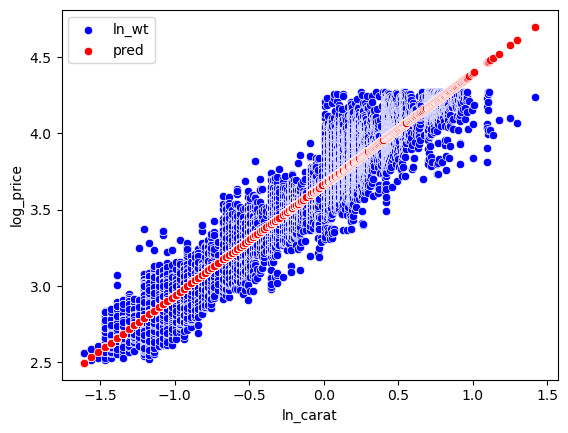

In [189]:
sns.scatterplot(data=all_diamond_data, x='ln_carat', y='log_price', color='blue', label='ln_wt')
sns.scatterplot(data=all_diamond_data, x='ln_carat', y='log_price_pred', color='red', label='pred')
plt.legend()
plt.show()

### The correlation is excellent, but even on a log/log plot, the variability in price per carat is apparent

## The equation for a linear regression line is Y = mX + B where....
    * Y is the **dependent** variable
    * m is the slope of the line
    * X is the independent variable
    * B is the Y-intercept

In [229]:
# Enter desired diamond size values in carats to calculate log-e values for entry in following string
# to calculate predicted cost
x = np.log(0.9)  # Value in carats here, log-e returned below
x

-0.10536051565782628

In [240]:
# Now we can input a string of values representing 0.5, 0.75. and 0.9 carats
# input_string = '-0.69, -0.29, -0.105' 
# X_new = np.array([float(x) for x in input_string.split(',')]).reshape(-1, 1)
# y_pred = np.power(10, model.predict(X_new))

In [237]:
# Print the results
print(f"Predicted values for X = {input_string}: {y_pred}")

Predicted values for X = -0.69, -0.29, -0.105: [1466.19516088 2863.36178085 3902.27416154]
